# __Final Project:__ Profiling Portfolio based on KMeans Clustering 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import vstack,array
from math import sqrt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

# Import from mlfinlab
from mlfinlab.portfolio_optimization.cla import CriticalLineAlgorithm
from mlfinlab.portfolio_optimization.herc import HierarchicalEqualRiskContribution
from mlfinlab.portfolio_optimization.hrp import HierarchicalRiskParity
from mlfinlab.portfolio_optimization.mean_variance import MeanVarianceOptimisation
from mlfinlab.portfolio_optimization import ReturnsEstimators

%matplotlib inline

### __Tunjukkan 3 Clustering Perusahaan Terbuka yang sudah dipilih menggunakan KMeans Clustering__

In [2]:
df_data = pd.read_csv('FinPro_dataset_1_Final.csv')
df_data_drop = df_data.drop(['Unnamed: 0'], axis=1)
df_data_drop.sort_values(by='Equity', ascending=False)

,Company_Name,Code_Name,Subsector,Equity,PBVR,DER,Div_Yield,ROE,DPR
16,Bank Mandiri (Persero) Tbk.,BMRI,Bank,173510.00,1.39,6.5853,0.0683,0.1824,0.5204
38,Astra International Tbk.,ASII,Automotive And Components,154580.00,1.28,1.1052,0.0412,0.1244,0.4505
15,Bank Negara Indonesia (Persero,BBNI,Bank,107480.00,0.81,7.0584,0.0442,0.1582,0.2261
52,United Tractors Tbk.,UNTR,Wholesale (Durable & Non-Durab,63100.00,1.09,0.7688,0.0656,0.1155,0.6205
8,Gudang Garam Tbk.,GGRM,Tobacco Manufacturers,53380.00,1.69,0.4394,0.0555,0.1833,0.5112
32,Adaro Energy Tbk.,ADRO,Coal Mining,52360.00,0.57,0.7883,0.1027,0.1050,0.6341
19,Bank Danamon Indonesia Tbk.,BDMN,Bank,42850.00,0.64,3.7328,0.0670,0.1162,0.3677
18,Bank CIMB Niaga Tbk.,BNGA,Bank,40010.00,0.52,5.8602,0.0667,0.1054,0.3297
22,Perusahaan Gas Negara Tbk.,PGAS,Energy,36400.00,0.65,1.7905,0.0366,0.0735,0.3222
2,Indocement Tunggal Prakarsa Tb,INTP,Basic Industry And Chemicals,23480.00,1.82,0.1660,0.0474,0.0682,1.2644


In [3]:
KMeans_cluster = pd.read_csv('KMeans_portfolio_clustering.csv')
KMeans_cluster = KMeans_cluster.drop(['Unnamed: 0'], axis=1)
KMeans_cluster.sort_values(by='Cluster',ascending=True)

,Stock Symbol,Cluster
11,MFIN,0
14,NRCA,0
9,LSIP,0
15,PBID,0
7,INDS,0
20,SCCO,0
19,PTRO,0
3,DVLA,0
5,EPMT,0
21,TPMA,1


### Labelling Clustering data (KMeans Clustering) with new label
#### __Cluster 0__ = Cluster 2
#### __Cluster 1__ = Cluster 1
#### __Cluster 2__ = Cluster 3

In [12]:
KMeans_cluster_new = KMeans_cluster.copy()
cluster_dict = {1:1, 0:2, 2:3}
KMeans_cluster_new['Cluster'] = KMeans_cluster_new['Cluster'].map(cluster_dict)
KMeans_cluster_new.sort_values(by='Cluster', ascending=True)

,Stock Symbol,Cluster
16,PGLI,1
1,CEKA,1
2,DMAS,1
21,TPMA,1
12,MFMI,1
22,VINS,1
14,NRCA,2
9,LSIP,2
11,MFIN,2
7,INDS,2


<hr>

## __Profiling Cluster 1__

In [13]:
cluster1 = df_data.iloc[[5, 10, 27, 41, 47, 48]]
cluster1 = cluster1.drop(['Unnamed: 0'], axis=1)
cluster1.sort_values(by='Div_Yield', ascending=False)

,Company_Name,Code_Name,Subsector,Equity,PBVR,DER,Div_Yield,ROE,DPR
47,Multifiling Mitra Indonesia Tb,MFMI,Others - Trade Services & Inve,245.12,1.59,0.9744,0.5126,0.1333,6.1395
41,Puradelta Lestari Tbk.,DMAS,Property And Real Estate,6440.00,1.34,0.1894,0.2333,0.0331,10.5000
27,Trans Power Marine Tbk.,TPMA,Transportation,11236.40,0.65,0.3829,0.0821,0.0596,0.8867
10,Victoria Insurance Tbk.,VINS,Insurance,177.03,1.01,0.4403,0.0772,0.0302,2.3750
5,Wilmar Cahaya Indonesia Tbk.,CEKA,Food And Beverages,1200.00,0.97,0.1952,0.0510,0.2216,0.2242
48,Pembangunan Graha Lestari Inda,PGLI,"Tourism, Restaurant And Hotel",64.94,1.62,0.4399,0.0463,0.0274,2.5000


In [14]:
#import historical stock prices data from 2015 - 2020

CEKA = pd.read_csv('CEKA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PGLI = pd.read_csv('PGLI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DMAS = pd.read_csv('DMAS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
TPMA = pd.read_csv('TPMA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFMI = pd.read_csv('MFMI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
VINS = pd.read_csv('VINS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)

l = [CEKA, PGLI, DMAS, TPMA, MFMI, VINS]
stock_prices_cluster1 = pd.concat(l,keys= ['CEKA', 'PGLI', 'DMAS', 'TPMA', 'MFMI', 'VINS', 'POWR', 'PPRE', 'WSBP'],axis=0).reset_index()
stock_prices_cluster1 = stock_prices_cluster1.drop(['Open', 'High', 'Low', 'Close','Volume'], axis=1)
stock_prices_cluster1['Date'] = pd.to_datetime(stock_prices_cluster1['Date'])
stock_prices_cluster1 = stock_prices_cluster1.set_index('Date', drop=True)
stock_prices_cluster1 = stock_prices_cluster1.sort_index()
stock_prices_cluster1 = stock_prices_cluster1.pivot_table('Adj Close', ['Date'], 'level_0')
stock_prices_cluster1 = stock_prices_cluster1.dropna(axis=0)

stock_prices_cluster1.head(10)

level_0,CEKA,DMAS,MFMI,PGLI,TPMA,VINS
Date,,,,,,
2018-08-08,888.511353,85.289276,544.202515,194.372086,261.107880,110.869713
2018-08-09,916.569580,84.612381,576.006592,194.372086,257.430298,106.572433
2018-08-10,963.333313,100.857964,576.006592,194.372086,257.430298,109.150795
2018-08-13,925.922302,99.504158,576.006592,194.372086,246.397583,108.291344
2018-08-14,944.627808,90.704475,572.472778,194.372086,229.848495,108.291344
2018-08-15,939.951477,93.412071,572.472778,194.372086,239.042435,103.134605
2018-08-16,963.333313,90.704475,572.472778,194.372086,237.203644,103.994064
2018-08-17,963.333313,90.704475,572.472778,194.372086,237.203644,103.994064
2018-08-20,958.656982,91.381371,498.263367,194.372086,233.526062,97.977882


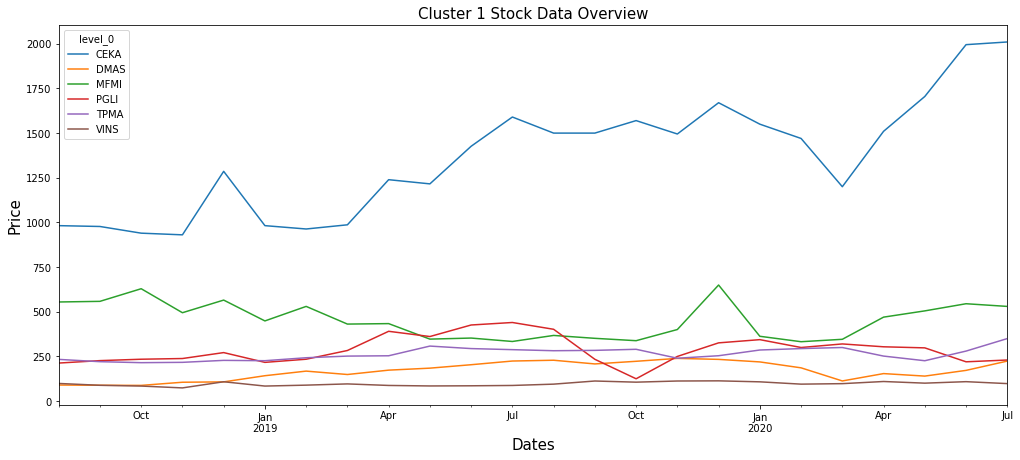

In [15]:
# Taking a quick look at the data
stock_prices_cluster1.resample('M').last().plot(figsize=(17,7))
plt.ylabel('Price', size=15)
plt.xlabel('Dates', size=15)
plt.title('Cluster 1 Stock Data Overview', size=15)
# plt.savefig('Cluster 1 Stock Data Overview.png')
plt.show()

In [7]:
stock_prices_downsampled_cluster1 = stock_prices_cluster1.resample('W').last()
stock_prices_downsampled_cluster1.head()

level_0,CEKA,DMAS,MFMI,PGLI,TPMA,VINS
Date,,,,,,
2018-08-12,963.333313,100.857964,576.006592,194.372086,257.430298,109.150795
2018-08-19,963.333313,90.704475,572.472778,194.372086,237.203644,103.994064
2018-08-26,1038.155396,94.765869,533.601196,210.976746,222.493332,103.134605
2018-09-02,982.038818,90.027573,554.803894,212.930237,233.526062,98.837334
2018-09-09,982.038818,79.874092,554.803894,212.930237,226.170914,101.415703


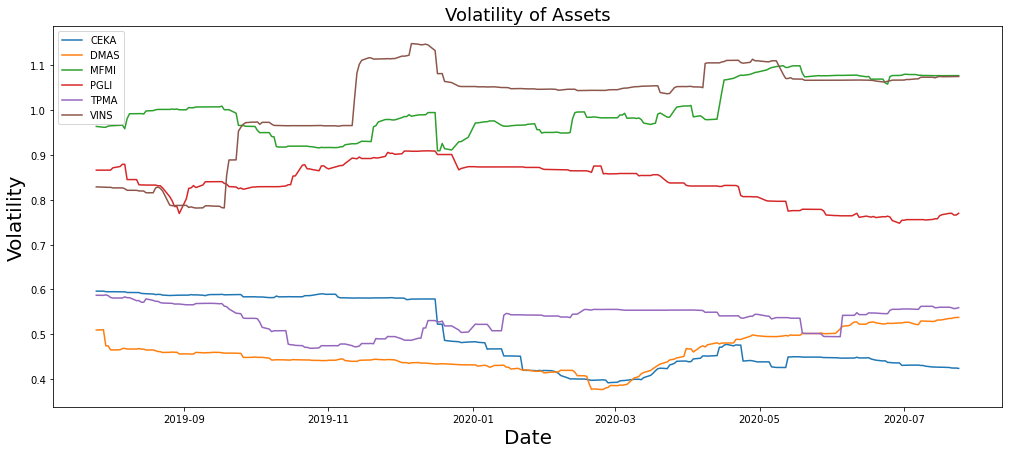

In [16]:
# plotting the volatility of our stocks
volatility = stock_prices_cluster1.pct_change().rolling(window=252).std()*(252**0.5)

plt.figure(figsize=(17,7))
plt.plot(volatility)
plt.ylabel('Volatility', size=20)
plt.xlabel('Date', size=20)
plt.title('Volatility of Assets', size=18)
plt.legend(stock_prices_cluster1.columns, loc='upper left')
# plt.savefig('Cluster 1 Volatility of Assets.png')
plt.show()

In [9]:
#Calculating the percentage change with the previous day price for each asset. This gives us the return for the asset for different time periods

stock_returns_cluster1 = stock_prices_downsampled_cluster1.pct_change().dropna(how='all')
stock_returns_cluster1.head()

level_0,CEKA,DMAS,MFMI,PGLI,TPMA,VINS
Date,,,,,,
2018-08-19,0.000000,-0.100671,-0.006135,0.000000,-0.078571,-0.047244
2018-08-26,0.077670,0.044776,-0.067901,0.085427,-0.062016,-0.008265
2018-09-02,-0.054054,-0.050000,0.039735,0.009259,0.049587,-0.041667
2018-09-09,0.000000,-0.112782,0.000000,0.000000,-0.031496,0.026087
2018-09-16,0.033333,0.084746,-0.031847,0.082569,-0.081301,-0.076271


## Computing the Covariance of the Return, V.

<Figure size 504x504 with 0 Axes>

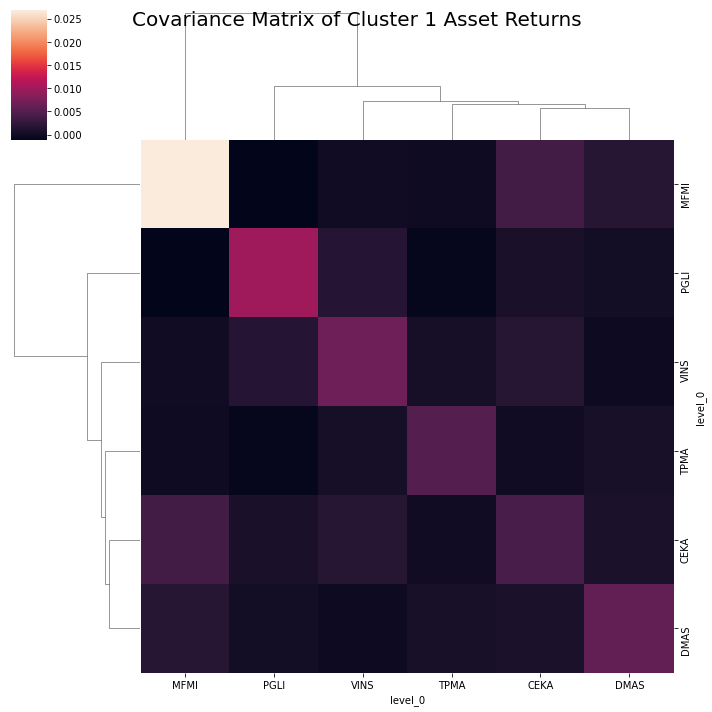

In [10]:
V = stock_returns_cluster1.cov()
plt.figure(figsize=(7, 7))
g = sns.clustermap(V)
g.fig.suptitle('Covariance Matrix of Cluster 1 Asset Returns', fontsize = 20)
plt.show()

## Identifying the hierarchical clusters among the N strategies

In [11]:
correlation_cluster1 = stock_returns_cluster1.corr()
distances_cluster1 = np.sqrt((1 - correlation_cluster1) / 2)
clusters1 = linkage(squareform(distances_cluster1), method="single")
clusters1

array([[0.        , 2.        , 0.56403565, 2.        ],
       [5.        , 6.        , 0.58132559, 3.        ],
       [3.        , 7.        , 0.62905484, 4.        ],
       [1.        , 8.        , 0.63974588, 5.        ],
       [4.        , 9.        , 0.6586283 , 6.        ]])

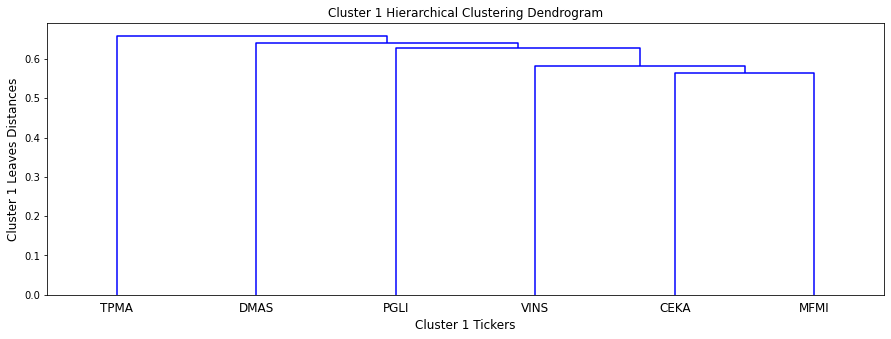

In [12]:
columns = stock_returns_cluster1.columns
plt.figure(figsize=(15, 5))
dendrogram(clusters1, labels=columns)
plt.xlabel('Cluster 1 Tickers', fontsize=12)
plt.ylabel('Cluster 1 Leaves Distances', fontsize=12)
plt.title('Cluster 1 Hierarchical Clustering Dendrogram', fontsize=12)
plt.show()

<Figure size 504x504 with 0 Axes>

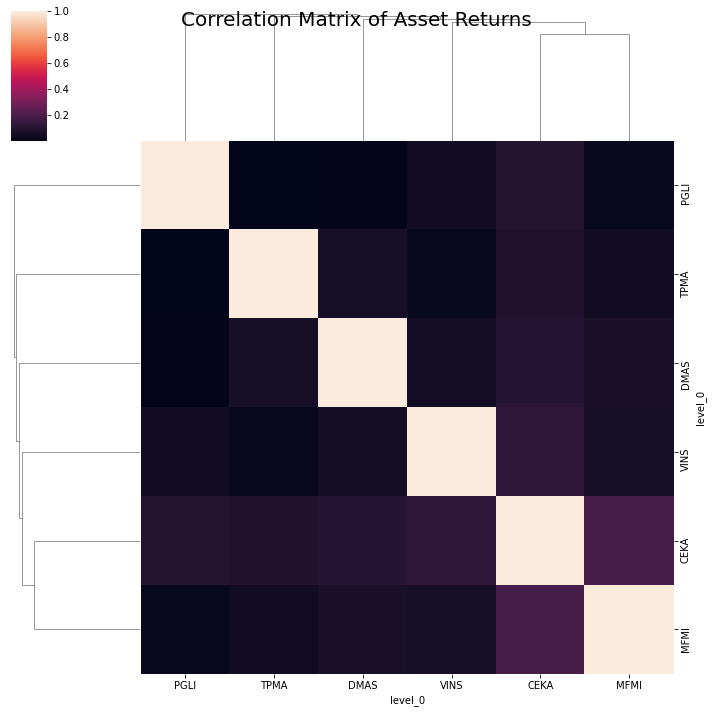

In [13]:
asset_returns = ReturnsEstimators.calculate_returns(stock_prices_cluster1)
plt.figure(figsize=(7,7))
g = sns.clustermap(asset_returns.corr())
g.fig.suptitle('Correlation Matrix of Asset Returns', fontsize = 20)
plt.show()

## Computing the HRP allocations

In [14]:
hrp_cluster1 = HierarchicalRiskParity()
hrp_cluster1.allocate(asset_prices=stock_prices_cluster1)
hrp_weights_cluster1 = hrp_cluster1.weights.sort_values(by=0, ascending=False, axis=1)
hrp_weights_cluster1.T

,0
level_0,
DMAS,0.277086
CEKA,0.238795
TPMA,0.232559
PGLI,0.112803
VINS,0.078461
MFMI,0.060296


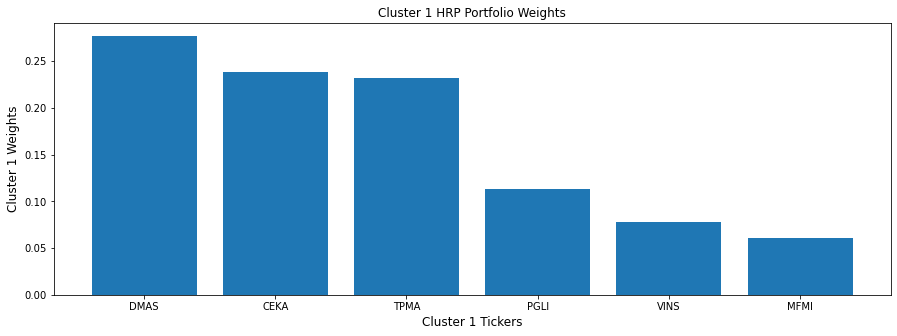

In [15]:
plt.figure(figsize=(15, 5))
plt.bar(hrp_weights_cluster1.columns, hrp_weights_cluster1.values[0])
plt.xlabel('Cluster 1 Tickers', fontsize=12)
plt.ylabel('Cluster 1 Weights', fontsize=12)
plt.title('Cluster 1 HRP Portfolio Weights', fontsize=12)
plt.show()

## Computing HRC Allocations *(with Conditional Drawdown at Risk as Risk Measure)*

In [25]:
herc_cluster1 = HierarchicalEqualRiskContribution()
herc_cluster1.allocate(asset_prices=stock_prices_cluster1, risk_measure='conditional_drawdown_risk')
herc_weights_cluster1 = herc_cluster1.weights.sort_values(by=0, ascending=False, axis=1)
herc_weights_cluster1.T

,0
level_0,
DMAS,0.318493
TPMA,0.299161
PGLI,0.192656
CEKA,0.078473
VINS,0.058228
MFMI,0.052989


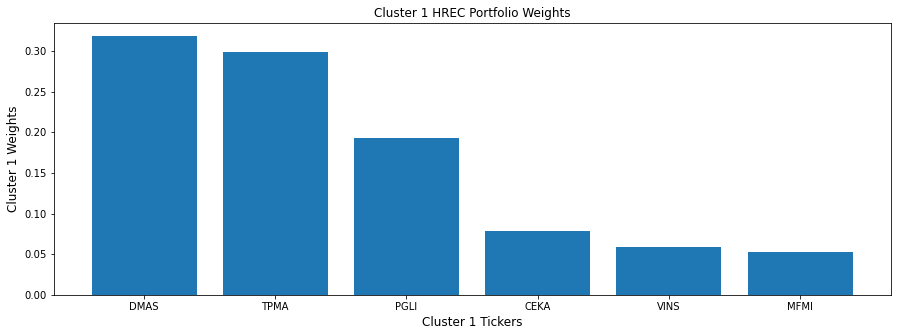

In [26]:
plt.figure(figsize=(15, 5))
plt.bar(herc_weights_cluster1.columns, herc_weights_cluster1.values[0])
plt.xlabel('Cluster 1 Tickers', fontsize=12)
plt.ylabel('Cluster 1 Weights', fontsize=12)
plt.title('Cluster 1 HREC Portfolio Weights', fontsize=12)
# plt.savefig('Cluster 1 HERC Portfolio Weights CDaR.png')
plt.show()

## Computing the minimum variance (min volatility) solution using Critical Line Algorithm

In [18]:
cla_cluster1 = CriticalLineAlgorithm()
cla_cluster1.allocate(asset_prices=stock_prices_cluster1, resample_by='W', solution='min_volatility')
cla_weights_cluster1 = cla_cluster1.weights.sort_values(by=0, ascending=False, axis=1)
cla_weights_cluster1.T

,0
level_0,
TPMA,0.293854
CEKA,0.231131
DMAS,0.194616
PGLI,0.143335
VINS,0.118806
MFMI,0.018258


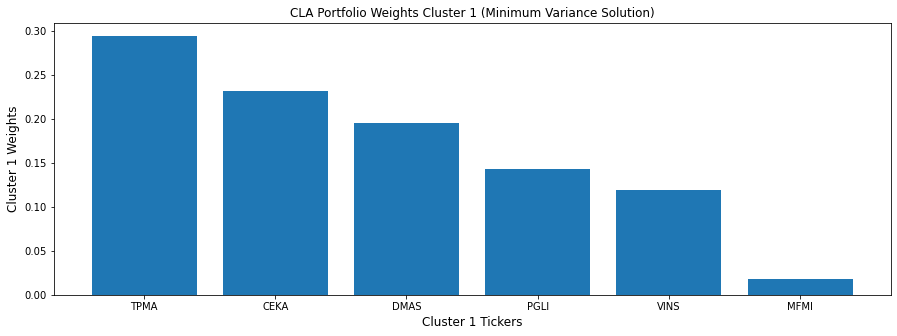

In [19]:
plt.figure(figsize=(15, 5))
plt.bar(cla_weights_cluster1.columns, cla_weights_cluster1.values[0])
plt.xlabel('Cluster 1 Tickers', fontsize=12)
plt.ylabel('Cluster 1 Weights', fontsize=12)
plt.title('CLA Portfolio Weights Cluster 1 (Minimum Variance Solution)', fontsize=12)
plt.show()

## Computing Inverse Variance Portfolio Allocations

In [20]:
mvo = MeanVarianceOptimisation()
mvo.allocate(asset_prices=stock_prices_cluster1, solution='inverse_variance')
ivp_weights_cluster1 = mvo.weights.sort_values(by=0, ascending=False, axis=1)
ivp_weights_cluster1.T

,0
level_0,
CEKA,0.269822
DMAS,0.261187
TPMA,0.217513
PGLI,0.106330
VINS,0.077018
MFMI,0.068130


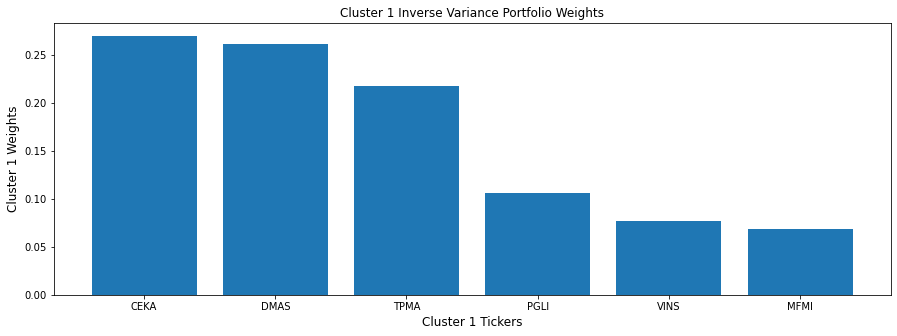

In [21]:
plt.figure(figsize=(15, 5))
plt.bar(ivp_weights_cluster1.columns, ivp_weights_cluster1.values[0])
plt.xlabel('Cluster 1 Tickers', fontsize=12)
plt.ylabel('Cluster 1 Weights', fontsize=12)
plt.title('Cluster 1 Inverse Variance Portfolio Weights', fontsize=12)
plt.show()

## Cluster 1 Expected Annualized Returns

In [24]:
assets_annual_returns_cluster1 = ret_est_cluster1.calculate_mean_historical_returns(stock_prices_cluster1, frequency=252)
assets_annual_returns_cluster1.sort_values(ascending=False)

level_0
DMAS    0.621634
CEKA    0.541828
MFMI    0.493814
PGLI    0.425211
VINS    0.368531
TPMA    0.309216
dtype: float64

In [25]:
print('Cluster 1 portfolio selection give expected annual return: ', assets_annual_returns_cluster1.mean()*100, 'percent')

Cluster 1 portfolio selection give expected annual return:  46.00389815444406 percent


## Cluster 1 Expected Exponential Annualized Return 

In [26]:
assets_exp_annual_returns_cluster1 = ret_est_cluster1.calculate_exponential_historical_returns(stock_prices_cluster1, frequency=252, span=200)
assets_exp_annual_returns_cluster1.sort_values(ascending=False)

level_0
MFMI    1.013540
DMAS    0.797835
TPMA    0.778491
CEKA    0.717327
VINS    0.256638
PGLI   -0.209312
Name: 2020-07-24 00:00:00, dtype: float64

In [27]:
print('Cluster 1 portfolio give expected annual return exponentially: ', assets_exp_annual_returns_cluster1.mean()*100, 'percent')

Cluster 1 portfolio give expected annual return exponentially:  55.908653752813244 percent


## __Evaluating Cluster 1__

In [76]:
from mlfinlab.portfolio_optimization import RiskMetrics
from mlfinlab.backtest_statistics import sharpe_ratio, probabilistic_sharpe_ratio, information_ratio, minimum_track_record_length, bets_concentration, all_bets_concentration

In [77]:
risk_met_cluster1 = RiskMetrics()
CDar_cluster1 = risk_met_cluster1.calculate_conditional_drawdown_risk(assets_annual_returns_cluster1 , 0.05)
CVar_cluster1 = risk_met_cluster1.calculate_expected_shortfall(assets_annual_returns_cluster1 , 0.05)
VaR_cluster1 = risk_met_cluster1.calculate_value_at_risk(assets_annual_returns_cluster1 , 0.05)
sr_cluster1 = sharpe_ratio(assets_annual_returns_cluster1, risk_free_rate=0.05)
psr_cluster1 = probabilistic_sharpe_ratio(sr_cluster1, 1.0, 252)
information_r_cluster1 = information_ratio(assets_annual_returns_cluster1, benchmark=0.05)
min_record_length_cluster1 = minimum_track_record_length(sr_cluster1, 1.0)
concentration_cluster1 = bets_concentration(assets_annual_returns_cluster1)

In [78]:
pd.DataFrame(data = [CDar_cluster1, CVar_cluster1, VaR_cluster1, sr_cluster1, psr_cluster1, information_r_cluster1, min_record_length_cluster1, concentration_cluster1],
            index = ['Conditional Drawdown at Risk', 'Expected Shortfall', 'Variance at Risk', 'Sharpe Ratio', 'Probabilistic Sharpe Ratio', 'Information Ratio', 'Minimum Record Length', 'Bets Concentration'],
             columns = ['Score']
            )

,Score
Conditional Drawdown at Risk,0.312418
Expected Shortfall,0.309216
Variance at Risk,0.368531
Sharpe Ratio,56.536342
Probabilistic Sharpe Ratio,1.000000
Information Ratio,56.536342
Minimum Record Length,2.402804
Bets Concentration,0.010439


<hr>

## __Profiling Cluster 2__

In [17]:
cluster2 = df_data.iloc[[0, 3, 6, 9, 33, 35, 36, 42, 50]]
cluster2 = cluster2.drop(['Unnamed: 0'], axis=1)
cluster2.sort_values(by='Div_Yield', ascending=False)

,Company_Name,Code_Name,Subsector,Equity,PBVR,DER,Div_Yield,ROE,DPR
42,Nusa Raya Cipta Tbk.,NRCA,Building Construction,1250.0,0.75,0.9575,0.0802,0.0898,0.6667
33,Petrosea Tbk.,PTRO,Non Building Construction,2939.3,0.43,1.6297,0.0732,0.0801,0.2487
3,Panca Budi Idaman Tbk.,PBID,Plastics & Packaging,1730.0,0.92,0.3805,0.0694,0.1426,0.4504
36,Supreme Cable Manufacturing &,SCCO,Cable,3270.0,0.59,0.2709,0.0535,0.1353,0.2325
9,Mandala Multifinance Tbk.,MFIN,Financial Institution,2370.0,1.14,1.0770,0.0490,0.1809,0.3086
50,Enseval Putera Megatrading Tbk,EPMT,Wholesale (Durable & Non-Durab,6260.0,0.80,0.5354,0.0486,0.1124,0.3462
6,Darya-Varia Laboratoria Tbk.,DVLA,Pharmaceuticals,1350.0,1.87,0.4374,0.0476,0.1679,0.5297
35,Indospring Tbk.,INDS,Automotive And Components,2600.0,0.55,0.1068,0.0461,0.0662,0.3802
0,PP London Sumatra Indonesia Tb,LSIP,Plantation,8580.0,0.67,0.2202,0.0225,0.0377,0.3958


In [18]:
#import historical stock prices data 2015 - 2020

NRCA = pd.read_csv('NRCA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
LSIP = pd.read_csv('LSIP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFIN = pd.read_csv('MFIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDS = pd.read_csv('INDS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
SCCO = pd.read_csv('SCCO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
EPMT = pd.read_csv('EPMT.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DVLA = pd.read_csv('DVLA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PBID = pd.read_csv('PBID.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PTRO = pd.read_csv('PTRO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)

m = [NRCA, LSIP, MFIN, INDS, SCCO, EPMT, DVLA, PBID, PTRO]

stock_prices_cluster2 = pd.concat(m,keys= ['NRCA', 'LSIP', 'MFIN', 'INDS', 'SCCO', 'EPMT', 'DVLA', 'PBID', 'PTRO'],axis=0).reset_index()
stock_prices_cluster2 = stock_prices_cluster2.drop(['Open', 'High', 'Low', 'Close','Volume'], axis=1)
stock_prices_cluster2['Date'] = pd.to_datetime(stock_prices_cluster2['Date'])
stock_prices_cluster2 = stock_prices_cluster2.set_index('Date', drop=True)
stock_prices_cluster2 = stock_prices_cluster2.sort_index()
stock_prices_cluster2 = stock_prices_cluster2.pivot_table('Adj Close', ['Date'], 'level_0')
stock_prices_cluster2 = stock_prices_cluster2.dropna(axis=0)

stock_prices_cluster2.head(10)

level_0,DVLA,EPMT,INDS,LSIP,MFIN,NRCA,PBID,PTRO,SCCO
Date,,,,,,,,,
2017-12-13,1702.801636,2751.608887,1089.568481,1167.731934,620.314941,276.711945,702.510315,1522.325684,7818.976074
2017-12-14,1720.266357,2751.608887,1093.944336,1181.914917,626.844604,278.176025,682.552551,1476.067139,7818.976074
2017-12-15,1711.533936,2742.436768,1107.071655,1200.825562,624.668030,278.176025,678.561096,1509.709717,7775.048828
2017-12-18,1685.337158,2742.436768,1120.198975,1229.191528,626.844604,276.711945,674.569519,1480.272461,7818.976074
2017-12-19,1711.533936,2742.436768,1102.695801,1229.191528,626.844604,275.247894,682.552551,1480.272461,7775.048828
2017-12-20,1728.998535,2742.436768,1080.817017,1196.097900,611.608765,267.927399,686.544128,1429.808594,7753.085449
2017-12-21,1694.069336,2742.436768,1098.320190,1181.914917,626.844604,270.855591,690.535645,1421.397949,7753.085449
2017-12-22,1707.167725,2742.436768,1093.944336,1177.187134,626.844604,275.247894,690.535645,1366.728760,7753.085449
2017-12-25,1707.167725,2742.436768,1093.944336,1177.187134,626.844604,275.247894,690.535645,1366.728760,7753.085449


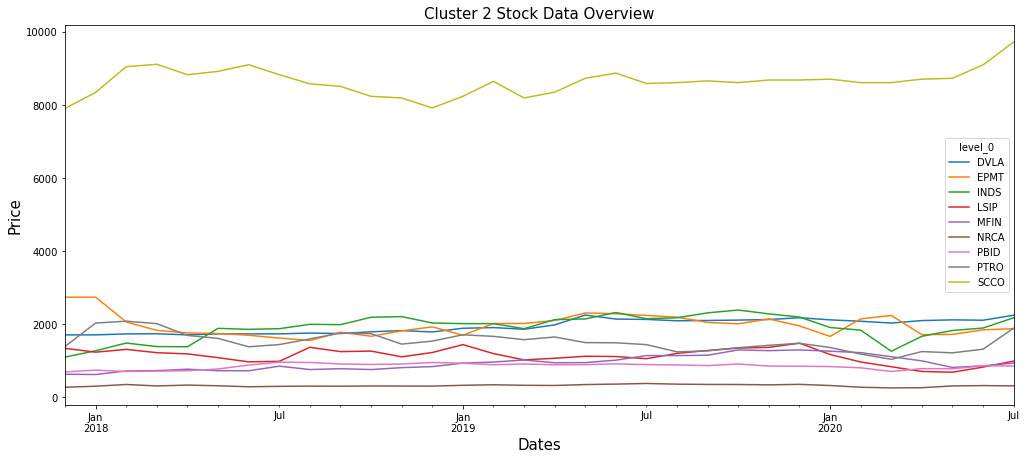

In [19]:
# Taking a quick look at the data
stock_prices_cluster2.resample('M').last().plot(figsize=(17,7))
plt.ylabel('Price', size=15)
plt.xlabel('Dates', size=15)
plt.title('Cluster 2 Stock Data Overview', size=15)
# plt.savefig('Cluster 2 Stock Data Overview.png')
plt.show()

In [31]:
stock_prices_downsampled_cluster2 = stock_prices_cluster2.resample('W').last()
stock_prices_downsampled_cluster2.head()

level_0,DVLA,EPMT,INDS,LSIP,MFIN,NRCA,PBID,PTRO,SCCO
Date,,,,,,,,,
2017-12-17,1711.533936,2742.436768,1107.071655,1200.825562,624.668030,278.176025,678.561096,1509.709717,7775.048828
2017-12-24,1707.167725,2742.436768,1093.944336,1177.187134,626.844604,275.247894,690.535645,1366.728760,7753.085449
2017-12-31,1711.533936,2742.436768,1102.695801,1342.655273,635.550781,278.176025,698.518738,1396.166016,7906.829590
2018-01-07,1728.998535,2742.436768,1220.841797,1281.195679,615.961853,284.032379,758.391724,1602.226685,8082.536621
2018-01-14,1711.533936,2742.436768,1225.217651,1314.289429,622.491516,304.529510,726.459412,1799.876709,8170.390137


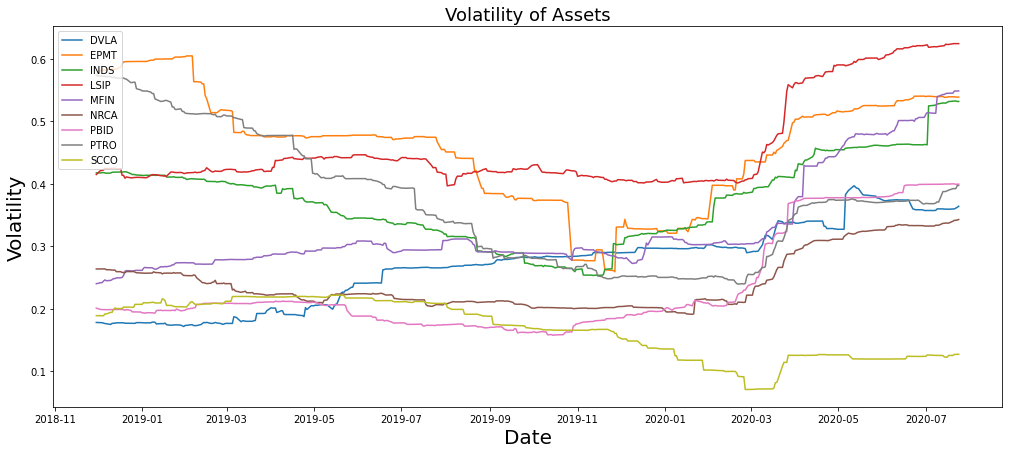

In [20]:
# plotting the volatility of our stocks
volatility = stock_prices_cluster2.pct_change().rolling(window=252).std()*(252**0.5)

plt.figure(figsize=(17,7))
plt.plot(volatility)
plt.ylabel('Volatility', size=20)
plt.xlabel('Date', size=20)
plt.title('Volatility of Assets', size=18)
plt.legend(stock_prices_cluster2.columns, loc='upper left')
# plt.savefig('Cluster 2 Volatility of Assets.png')
plt.show()

In [33]:
#Calculating the percentage change with the previous day price for each asset. This gives us the return for the asset for different time periods

stock_returns_cluster2 = stock_prices_downsampled_cluster2.pct_change().dropna(how='all')
stock_returns_cluster2.head()

level_0,DVLA,EPMT,INDS,LSIP,MFIN,NRCA,PBID,PTRO,SCCO
Date,,,,,,,,,
2017-12-24,-0.002551,0.0,-0.011858,-0.019685,0.003484,-0.010526,0.017647,-0.094708,-0.002825
2017-12-31,0.002558,0.0,0.008000,0.140562,0.013889,0.010638,0.011561,0.021538,0.019830
2018-01-07,0.010204,0.0,0.107143,-0.045775,-0.030822,0.021053,0.085714,0.147590,0.022222
2018-01-14,-0.010101,0.0,0.003584,0.025830,0.010601,0.072165,-0.042105,0.123360,0.010870
2018-01-21,0.015306,0.0,0.017857,-0.028777,0.006993,-0.024038,0.027473,0.000000,0.021505


## Computing the Covariance of the Return, W.

<Figure size 504x504 with 0 Axes>

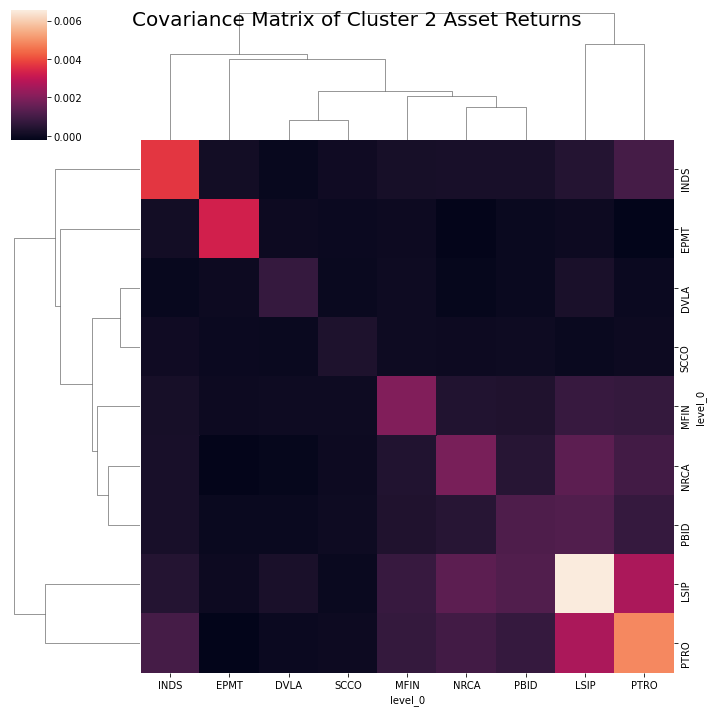

In [34]:
W = stock_returns_cluster2.cov()
plt.figure(figsize=(7, 7))
g = sns.clustermap(W)
g.fig.suptitle('Covariance Matrix of Cluster 2 Asset Returns', fontsize = 20)
plt.show()

## Identifying the hierarchical clusters among the N strategies

In [35]:
correlation_cluster2 = stock_returns_cluster2.corr()
distances_cluster2 = np.sqrt((1 - correlation_cluster2) / 2)
clusters2 = linkage(squareform(distances_cluster2), method="single")
clusters2

array([[ 3.        ,  7.        ,  0.51456663,  2.        ],
       [ 6.        ,  9.        ,  0.52801572,  3.        ],
       [ 5.        , 10.        ,  0.54473137,  4.        ],
       [ 4.        , 11.        ,  0.61414167,  5.        ],
       [ 2.        , 12.        ,  0.61443953,  6.        ],
       [ 0.        , 13.        ,  0.66174122,  7.        ],
       [ 8.        , 14.        ,  0.67449662,  8.        ],
       [ 1.        , 15.        ,  0.69291693,  9.        ]])

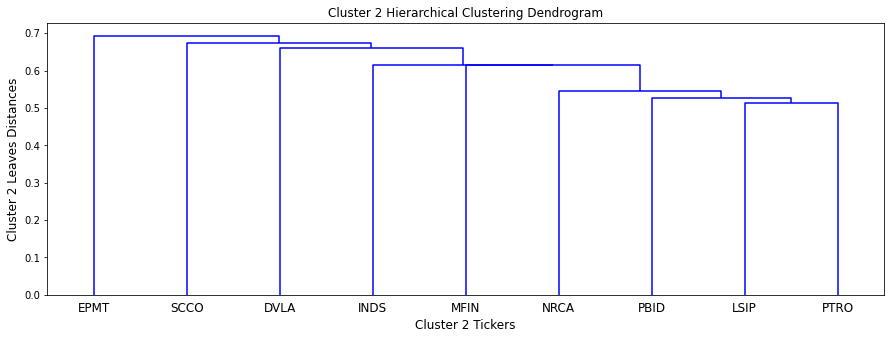

In [36]:
columns = stock_returns_cluster2.columns
plt.figure(figsize=(15, 5))
dendrogram(clusters2, labels=columns)
plt.xlabel('Cluster 2 Tickers', fontsize=12)
plt.ylabel('Cluster 2 Leaves Distances', fontsize=12)
plt.title('Cluster 2 Hierarchical Clustering Dendrogram', fontsize=12)
plt.show()

## Computing the HRP allocations

In [37]:
hrp_cluster2 = HierarchicalRiskParity()
hrp_cluster2.allocate(asset_prices=stock_prices_cluster2)
hrp_weights_cluster2 = hrp_cluster2.weights.sort_values(by=0, ascending=False, axis=1)
hrp_weights_cluster2.T

,0
level_0,
SCCO,0.423056
PBID,0.116183
DVLA,0.110079
NRCA,0.100879
MFIN,0.078077
INDS,0.066455
EPMT,0.047724
PTRO,0.032149
LSIP,0.025398


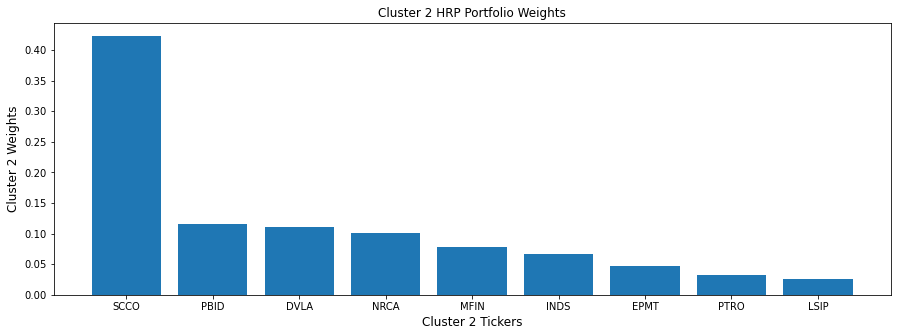

In [38]:
plt.figure(figsize=(15, 5))
plt.bar(hrp_weights_cluster2.columns, hrp_weights_cluster2.values[0])
plt.xlabel('Cluster 2 Tickers', fontsize=12)
plt.ylabel('Cluster 2 Weights', fontsize=12)
plt.title('Cluster 2 HRP Portfolio Weights', fontsize=12)
plt.show()

## Computing HRC Allocation with `Conditional Drawdown at Risk` as Risk Measure

In [27]:
herc_cluster2 = HierarchicalEqualRiskContribution()
herc_cluster2.allocate(asset_prices=stock_prices_cluster2, risk_measure='conditional_drawdown_risk')
herc_weights_cluster2 = herc_cluster2.weights.sort_values(by=0, ascending=False, axis=1)
herc_weights_cluster2.T

,0
level_0,
MFIN,0.354018
EPMT,0.266028
PBID,0.110552
DVLA,0.090646
NRCA,0.057088
SCCO,0.036760
PTRO,0.036505
LSIP,0.030892
INDS,0.017511


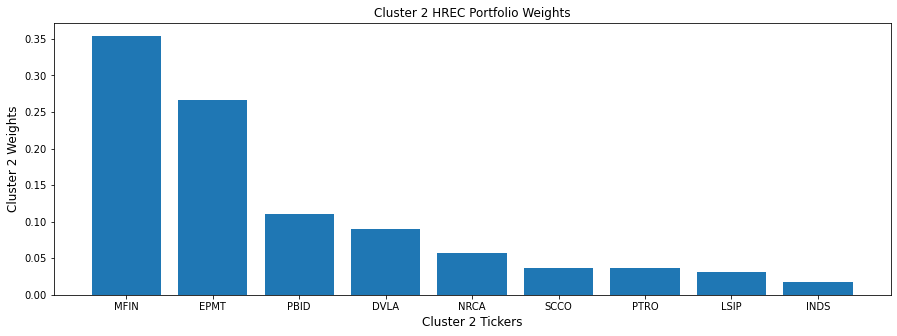

In [28]:
plt.figure(figsize=(15, 5))
plt.bar(herc_weights_cluster2.columns, herc_weights_cluster2.values[0])
plt.xlabel('Cluster 2 Tickers', fontsize=12)
plt.ylabel('Cluster 2 Weights', fontsize=12)
plt.title('Cluster 2 HREC Portfolio Weights', fontsize=12)
# plt.savefig('Cluster 2 HERC Portfolio Weights CDaR.png')
plt.show()

## Computing the minimum variance (min volatility) solution using Critical Line Algorithm

In [41]:
cla_cluster2 = CriticalLineAlgorithm()
cla_cluster2.allocate(asset_prices=stock_prices_cluster2, resample_by='W', solution='min_volatility')
cla_weights_cluster2 = cla_cluster2.weights.sort_values(by=0, ascending=False, axis=1)
cla_weights_cluster2.T

,0
level_0,
SCCO,0.494607
DVLA,0.246695
PBID,0.078081
NRCA,0.069840
EPMT,0.051569
MFIN,0.034801
INDS,0.024406
LSIP,0.000000
PTRO,0.000000


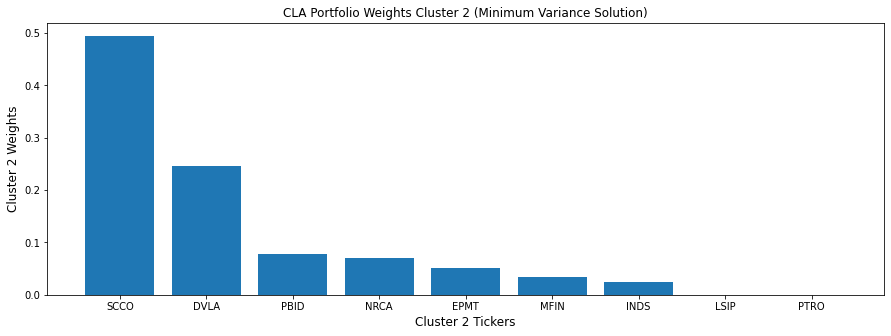

In [42]:
plt.figure(figsize=(15, 5))
plt.bar(cla_weights_cluster2.columns, cla_weights_cluster2.values[0])
plt.xlabel('Cluster 2 Tickers', fontsize=12)
plt.ylabel('Cluster 2 Weights', fontsize=12)
plt.title('CLA Portfolio Weights Cluster 2 (Minimum Variance Solution)', fontsize=12)
plt.show()

## Computing Inverse Variance Portfolio Allocations

In [43]:
mvo = MeanVarianceOptimisation()
mvo.allocate(asset_prices=stock_prices_cluster2, solution='inverse_variance')
ivp_weights_cluster2 = mvo.weights.sort_values(by=0, ascending=False, axis=1)
ivp_weights_cluster2.T

,0
level_0,
SCCO,0.357335
NRCA,0.129647
PBID,0.129122
DVLA,0.122338
MFIN,0.067753
INDS,0.056131
PTRO,0.053776
LSIP,0.042484
EPMT,0.041413


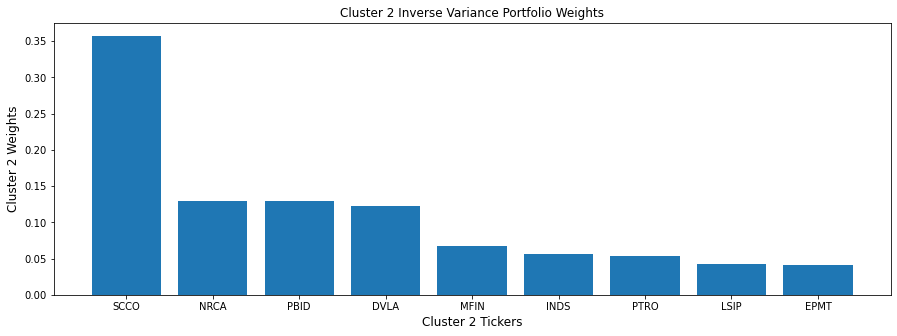

In [44]:
plt.figure(figsize=(15, 5))
plt.bar(ivp_weights_cluster2.columns, ivp_weights_cluster2.values[0])
plt.xlabel('Cluster 2 Tickers', fontsize=12)
plt.ylabel('Cluster 2 Weights', fontsize=12)
plt.title('Cluster 2 Inverse Variance Portfolio Weights', fontsize=12)
plt.show()

## Cluster 2 Expected Annualized Returns

In [47]:
assets_annual_returns_cluster2 = ret_est_cluster2.calculate_mean_historical_returns(stock_prices_cluster2, frequency=252)
assets_annual_returns_cluster2.sort_values(ascending=False)

level_0
INDS    0.353463
MFIN    0.232323
PTRO    0.179451
DVLA    0.147356
PBID    0.116378
SCCO    0.096956
NRCA    0.090673
LSIP    0.061897
EPMT   -0.016656
dtype: float64

In [48]:
print('Cluster 2 portfolio selection give expected annual return: ', assets_annual_returns_cluster2.mean()*100, 'percent')

Cluster 2 portfolio selection give expected annual return:  14.020453281164516 percent


In [49]:
assets_exp_annual_returns_cluster2 = ret_est_cluster2.calculate_exponential_historical_returns(stock_prices_cluster2, frequency=252, span=200)
assets_exp_annual_returns_cluster2.sort_values(ascending=False)

level_0
PTRO    0.952261
INDS    0.490385
LSIP    0.344260
SCCO    0.265480
DVLA    0.237250
PBID    0.161717
EPMT    0.097834
NRCA    0.085021
MFIN   -0.051989
Name: 2020-07-24 00:00:00, dtype: float64

In [50]:
print('Cluster 2 portfolio give expected annual return exponentially: ', assets_exp_annual_returns_cluster2.mean()*100, 'percent')

Cluster 2 portfolio give expected annual return exponentially:  28.691331521301745 percent


## __Evaluating Cluster 2__

In [80]:
risk_met_cluster2 = RiskMetrics()
CDar_cluster2 = risk_met_cluster2.calculate_conditional_drawdown_risk(assets_annual_returns_cluster2 , 0.05)
CVar_cluster2 = risk_met_cluster2.calculate_expected_shortfall(assets_annual_returns_cluster2 , 0.05)
VaR_cluster2 = risk_met_cluster2.calculate_value_at_risk(assets_annual_returns_cluster2 , 0.05)
sr_cluster2 = sharpe_ratio(assets_annual_returns_cluster2, risk_free_rate=0.05)
psr_cluster2 = probabilistic_sharpe_ratio(sr_cluster2, 1.0, 252)
information_r_cluster2 = information_ratio(assets_annual_returns_cluster2, benchmark=0.05)
min_record_length_cluster2 = minimum_track_record_length(sr_cluster2, 1.0)
concentration_cluster2 = bets_concentration(assets_annual_returns_cluster2)

In [81]:
pd.DataFrame(data = [CDar_cluster2, CVar_cluster2, VaR_cluster2, sr_cluster2, psr_cluster2, information_r_cluster2, min_record_length_cluster2, concentration_cluster2],
            index = ['Conditional Drawdown at Risk', 'Expected Shortfall', 'Variance at Risk', 'Sharpe Ratio', 'Probabilistic Sharpe Ratio', 'Information Ratio', 'Minimum Record Length', 'Bets Concentration'],
             columns = ['Score']
            )

,Score
Conditional Drawdown at Risk,0.291565
Expected Shortfall,-0.016656
Variance at Risk,0.061897
Sharpe Ratio,13.412560
Probabilistic Sharpe Ratio,1.000000
Information Ratio,13.412560
Minimum Record Length,2.597080
Bets Concentration,0.064427


<hr>

## __Cluster 3 Profiling__

In [21]:
cluster3 = df_data.iloc[[4, 15, 20, 21, 23, 29, 34, 40, 51]]
cluster3 = cluster3.drop(['Unnamed: 0'], axis=1)
cluster3.sort_values(by='Div_Yield', ascending=False)

,Company_Name,Code_Name,Subsector,Equity,PBVR,DER,Div_Yield,ROE,DPR
40,Indo-Rama Synthetics Tbk.,INDR,"Textile, Garment",5260.50,0.24,1.0903,0.1504,0.0460,0.7852
29,Mitrabara Adiperdana Tbk.,MBAP,Coal Mining,2245.60,0.79,0.3792,0.0955,0.3717,0.2025
51,MNC Studios International Tbk.,MSIN,"Advertising, Printing And Medi",1430.00,0.92,0.6068,0.0833,0.1669,0.4565
21,Indonesia Kendaraan Terminal T,IPCC,"Toll Road, Airport, Harbor",1090.00,0.72,0.7903,0.0811,0.0746,0.7749
34,Elnusa Tbk.,ELSA,Crude Petroleum & Natural Gas,3630.00,0.49,1.1532,0.0505,0.0571,0.4361
15,Bank Negara Indonesia (Persero,BBNI,Bank,107480.00,0.81,7.0584,0.0442,0.1582,0.2261
20,Cikarang Listrindo Tbk.,POWR,Energy,9250.92,0.88,0.9630,0.0418,0.0196,1.9143
4,Waskita Beton Precast Tbk.,WSBP,Cement,7210.00,0.74,1.1848,0.0407,0.0579,0.5138
23,PP Presisi Tbk.,PPRE,Non Building Construction,2240.00,0.89,1.9676,0.0332,0.0250,1.3000


In [22]:
#import historical stock prices data from 2015 - 2020

WSBP = pd.read_csv('WSBP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
BBNI = pd.read_csv('BBNI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
POWR = pd.read_csv('POWR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
IPCC = pd.read_csv('IPCC.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PPRE = pd.read_csv('PPRE.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MBAP = pd.read_csv('MBAP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
ELSA = pd.read_csv('ELSA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDR = pd.read_csv('INDR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MSIN = pd.read_csv('MSIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)

p = [WSBP, BBNI, POWR, IPCC, PPRE, MBAP, ELSA, INDR, MSIN]
stock_prices_cluster3 = pd.concat(p,keys= ['WSBP', 'BBNI', 'POWR', 'IPCC', 'PPRE', 'MBAP', 'ELSA', 'INDR', 'MSIN'],axis=0).reset_index()
stock_prices_cluster3 = stock_prices_cluster3.drop(['Open', 'High', 'Low', 'Close','Volume'], axis=1)
stock_prices_cluster3['Date'] = pd.to_datetime(stock_prices_cluster3['Date'])
stock_prices_cluster3 = stock_prices_cluster3.set_index('Date', drop=True)
stock_prices_cluster3 = stock_prices_cluster3.sort_index()
stock_prices_cluster3 = stock_prices_cluster3.pivot_table('Adj Close', ['Date'], 'level_0')
stock_prices_cluster3 = stock_prices_cluster3.dropna(axis=0)
# stock_prices = stock_prices.resample('D').sum()


stock_prices_cluster3.tail(10)

level_0,BBNI,ELSA,INDR,IPCC,MBAP,MSIN,POWR,PPRE,WSBP
Date,,,,,,,,,
2020-07-13,4750.0,231.789001,2270.0,422.0,1705.0,252.0,590.0,197.0,204.0
2020-07-14,4720.0,231.789001,2260.0,430.0,1690.0,252.0,590.0,195.0,202.0
2020-07-15,4710.0,231.789001,2270.0,428.0,1755.0,258.0,580.0,200.0,204.0
2020-07-16,4700.0,231.789001,2250.0,438.0,1890.0,254.0,590.0,200.0,208.0
2020-07-17,4670.0,234.000000,2260.0,438.0,1805.0,256.0,600.0,204.0,208.0
2020-07-20,4540.0,226.000000,2250.0,436.0,1840.0,256.0,600.0,202.0,202.0
2020-07-21,4680.0,238.000000,2300.0,430.0,1760.0,260.0,600.0,195.0,202.0
2020-07-22,4670.0,238.000000,2260.0,434.0,1750.0,272.0,600.0,195.0,202.0
2020-07-23,4710.0,238.000000,2300.0,442.0,1740.0,272.0,600.0,196.0,204.0


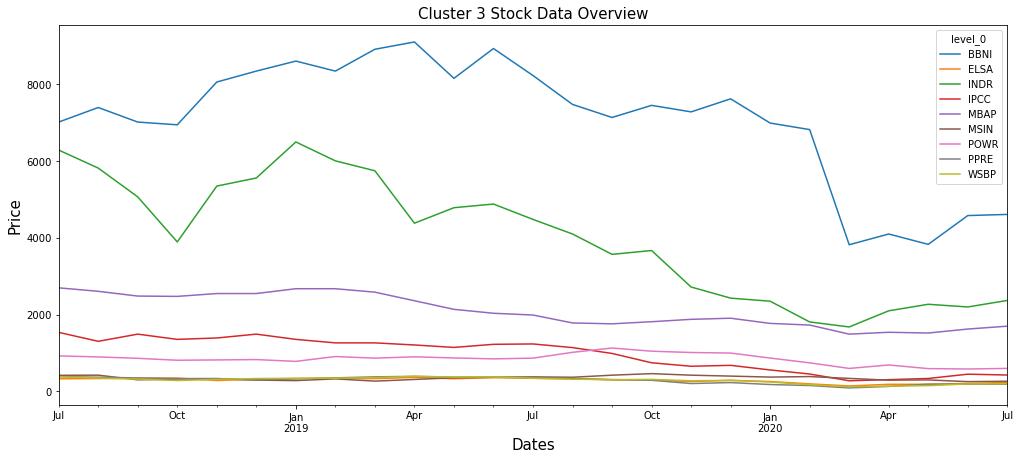

In [23]:
# Taking a quick look at the data
stock_prices_cluster3.resample('M').last().plot(figsize=(17,7))
plt.ylabel('Price', size=15)
plt.xlabel('Dates', size=15)
plt.title('Cluster 3 Stock Data Overview', size=15)
# plt.savefig('Cluster 3 Stock Data Overview.png')
plt.show()

In [54]:
stock_prices_downsampled_cluster3 = stock_prices_cluster3.resample('W').last()
stock_prices_downsampled_cluster3.head()

level_0,BBNI,ELSA,INDR,IPCC,MBAP,MSIN,POWR,PPRE,WSBP
Date,,,,,,,,,
2018-07-15,6872.443359,311.816345,6074.727051,1497.197266,2797.386475,478.354279,1044.489624,384.358185,338.761292
2018-07-22,6872.443359,315.528473,5629.090820,1497.197266,2690.112061,454.673370,949.123169,384.358185,344.138458
2018-07-29,7062.027832,339.657104,6332.727051,1529.052490,2929.416260,439.517578,940.040710,386.242279,362.062317
2018-08-05,7488.593262,361.929718,6356.181641,1510.849609,2723.119385,473.618103,908.251892,384.358185,367.439484
2018-08-12,7559.687500,354.505493,6285.818359,1492.646606,2673.608154,428.150757,894.628113,374.937653,372.816681


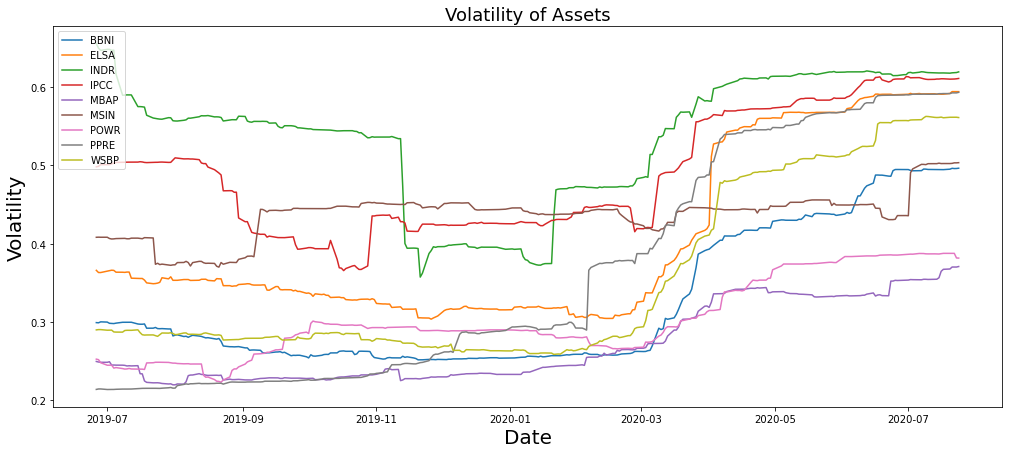

In [24]:
# plotting the volatility of our stocks
volatility = stock_prices_cluster3.pct_change().rolling(window=252).std()*(252**0.5)

plt.figure(figsize=(17,7))
plt.plot(volatility)
plt.ylabel('Volatility', size=20)
plt.xlabel('Date', size=20)
plt.title('Volatility of Assets', size=18)
plt.legend(stock_prices_cluster3.columns, loc='upper left')
# plt.savefig('Cluster 3 Volatility of Assets.png')
plt.show()

In [56]:
#Calculating the percentage change with the previous day price for each asset. This gives us the return for the asset for different time periods

stock_returns_cluster3 = stock_prices_downsampled_cluster3.pct_change().dropna(how='all')
stock_returns_cluster3.head()

level_0,BBNI,ELSA,INDR,IPCC,MBAP,MSIN,POWR,PPRE,WSBP
Date,,,,,,,,,
2018-07-22,0.000000,0.011905,-0.073359,0.000000,-0.038348,-0.049505,-0.091304,0.000000,0.015873
2018-07-29,0.027586,0.076471,0.125000,0.021277,0.088957,-0.033333,-0.009569,0.004902,0.052083
2018-08-05,0.060403,0.065574,0.003704,-0.011905,-0.070423,0.077586,-0.033816,-0.004878,0.014851
2018-08-12,0.009494,-0.020513,-0.011070,-0.012048,-0.018182,-0.096000,-0.015000,-0.024510,0.014634
2018-08-19,-0.112853,-0.094241,-0.089552,-0.073171,-0.043210,-0.035398,-0.015228,-0.035176,-0.081731


## Computing the Covariance of the Return, Z

<Figure size 504x504 with 0 Axes>

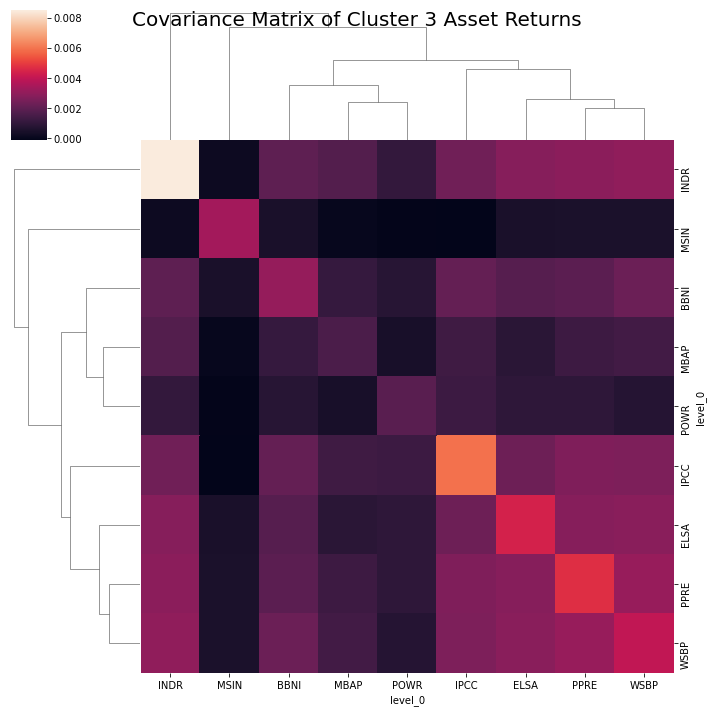

In [57]:
Z = stock_returns_cluster3.cov()
plt.figure(figsize=(7, 7))
j = sns.clustermap(Z)
j.fig.suptitle('Covariance Matrix of Cluster 3 Asset Returns', fontsize = 20)
plt.show()

## Identifying the hierarchical clusters among the N strategies

In [58]:
correlation_cluster3 = stock_returns_cluster3.corr()
distances_cluster3 = np.sqrt((1 - correlation_cluster3) / 2)
clusters3 = linkage(squareform(distances_cluster3), method="single")
clusters3

array([[ 7.        ,  8.        ,  0.36890145,  2.        ],
       [ 1.        ,  9.        ,  0.39721477,  3.        ],
       [ 0.        , 10.        ,  0.42289485,  4.        ],
       [ 4.        , 11.        ,  0.47253484,  5.        ],
       [ 3.        , 12.        ,  0.47830716,  6.        ],
       [ 2.        , 13.        ,  0.49311674,  7.        ],
       [ 6.        , 14.        ,  0.55883228,  8.        ],
       [ 5.        , 15.        ,  0.65371548,  9.        ]])

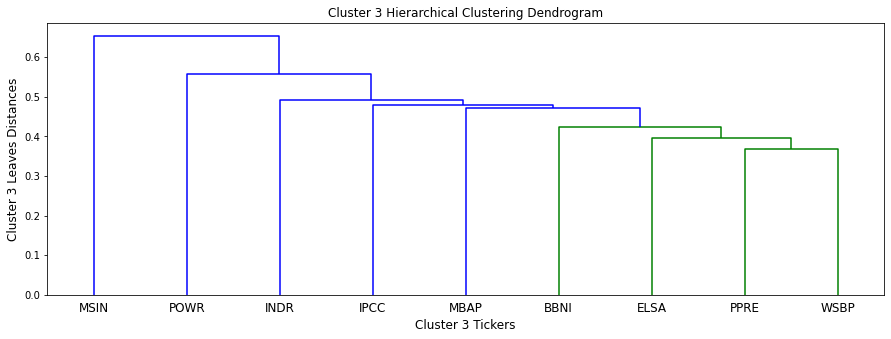

In [59]:
columns = stock_returns_cluster3.columns
plt.figure(figsize=(15, 5))
dendrogram(clusters3, labels=columns)
plt.xlabel('Cluster 3 Tickers', fontsize=12)
plt.ylabel('Cluster 3 Leaves Distances', fontsize=12)
plt.title('Cluster 3 Hierarchical Clustering Dendrogram', fontsize=12)
plt.show()

## Computing the HRP allocations

In [60]:
hrp_cluster3 = HierarchicalRiskParity()
hrp_cluster3.allocate(asset_prices=stock_prices_cluster3)
hrp_weights_cluster3 = hrp_cluster3.weights.sort_values(by=0, ascending=False, axis=1)
hrp_weights_cluster3.T

,0
level_0,
MBAP,0.266917
POWR,0.244083
MSIN,0.126318
BBNI,0.083889
ELSA,0.070110
INDR,0.063935
IPCC,0.054571
PPRE,0.045295
WSBP,0.044880


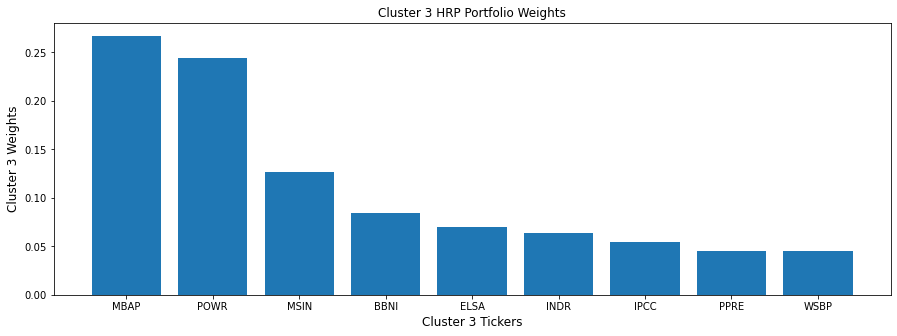

In [61]:
plt.figure(figsize=(15, 5))
plt.bar(hrp_weights_cluster3.columns, hrp_weights_cluster3.values[0])
plt.xlabel('Cluster 3 Tickers', fontsize=12)
plt.ylabel('Cluster 3 Weights', fontsize=12)
plt.title('Cluster 3 HRP Portfolio Weights', fontsize=12)
plt.show()

## Computing HRC Allocation using `Conditional Drawdown at Risk` as Risk Measure

In [29]:
herc_cluster3 = HierarchicalEqualRiskContribution()
herc_cluster3.allocate(asset_prices=stock_prices_cluster3, risk_measure='conditional_drawdown_risk')
herc_weights_cluster3 = herc_cluster3.weights.sort_values(by=0, ascending=False, axis=1)
herc_weights_cluster3.T

,0
level_0,
BBNI,0.251063
WSBP,0.177929
ELSA,0.149218
PPRE,0.147684
IPCC,0.123369
POWR,0.053866
MBAP,0.048787
MSIN,0.032141
INDR,0.015943


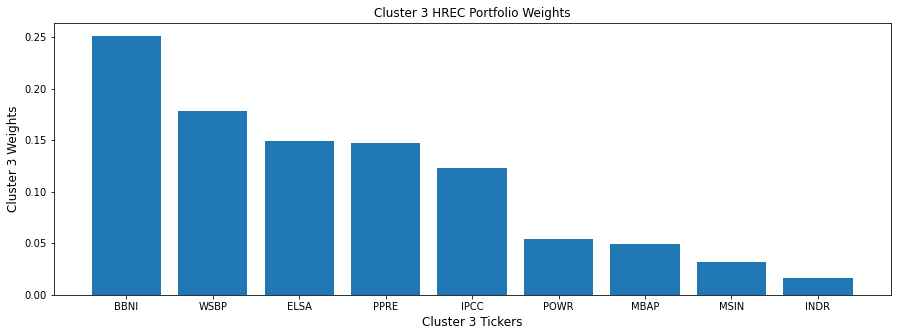

In [30]:
plt.figure(figsize=(15, 5))
plt.bar(herc_weights_cluster3.columns, herc_weights_cluster3.values[0])
plt.xlabel('Cluster 3 Tickers', fontsize=12)
plt.ylabel('Cluster 3 Weights', fontsize=12)
plt.title('Cluster 3 HREC Portfolio Weights', fontsize=12)
# plt.savefig('Cluster 3 HERC Portfolio Weights CDaR.png')
plt.show()

## Computing the minimum variance (min volatility) solution using Critical Line Algorithm

In [64]:
cla_cluster3 = CriticalLineAlgorithm()
cla_cluster3.allocate(asset_prices=stock_prices_cluster3, resample_by='W', solution='min_volatility')
cla_weights_cluster3 = cla_cluster3.weights.sort_values(by=0, ascending=False, axis=1)
cla_weights_cluster3.T

,0
level_0,
MBAP,0.406900
POWR,0.345706
MSIN,0.242862
ELSA,0.004532
BBNI,0.000000
INDR,0.000000
IPCC,0.000000
PPRE,0.000000
WSBP,0.000000


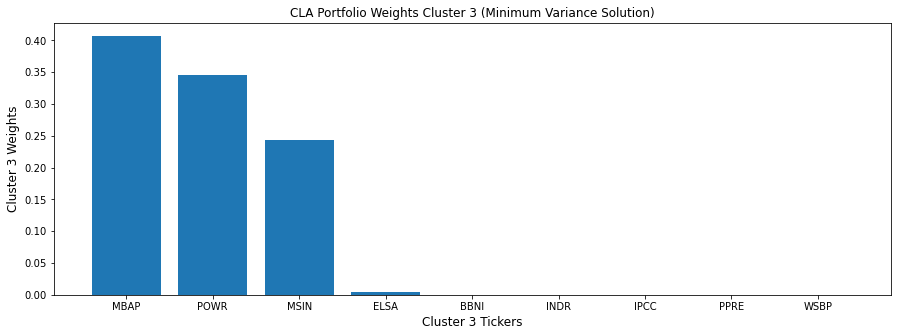

In [65]:
plt.figure(figsize=(15, 5))
plt.bar(cla_weights_cluster3.columns, cla_weights_cluster3.values[0])
plt.xlabel('Cluster 3 Tickers', fontsize=12)
plt.ylabel('Cluster 3 Weights', fontsize=12)
plt.title('CLA Portfolio Weights Cluster 3 (Minimum Variance Solution)', fontsize=12)
plt.show()

## Computing Inverse Variance Portfolio Allocations

In [66]:
mvo = MeanVarianceOptimisation()
mvo.allocate(asset_prices=stock_prices_cluster3, solution='inverse_variance')
ivp_weights_cluster3 = mvo.weights.sort_values(by=0, ascending=False, axis=1)
ivp_weights_cluster3.T

,0
level_0,
MBAP,0.201203
POWR,0.188090
BBNI,0.118655
PPRE,0.101145
WSBP,0.100217
MSIN,0.095219
ELSA,0.082212
IPCC,0.063991
INDR,0.049268


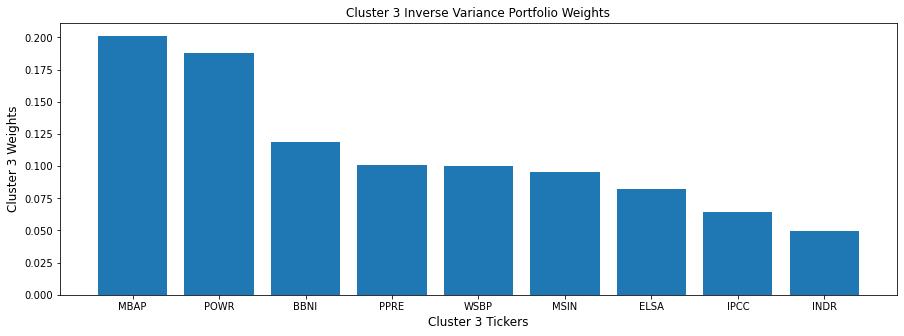

In [67]:
plt.figure(figsize=(15, 5))
plt.bar(ivp_weights_cluster3.columns, ivp_weights_cluster3.values[0])
plt.xlabel('Cluster 3 Tickers', fontsize=12)
plt.ylabel('Cluster 3 Weights', fontsize=12)
plt.title('Cluster 3 Inverse Variance Portfolio Weights', fontsize=12)
plt.show()

## Cluster 3 Expected Annualized Returns

In [70]:
assets_annual_returns_cluster3 = ret_est_cluster3.calculate_mean_historical_returns(stock_prices_cluster3, frequency=252)
assets_annual_returns_cluster3.sort_values(ascending=False)

level_0
ELSA   -0.046146
BBNI   -0.107705
WSBP   -0.146814
MSIN   -0.166384
MBAP   -0.185075
INDR   -0.198878
POWR   -0.207802
PPRE   -0.236629
IPCC   -0.469610
dtype: float64

In [71]:
print('Cluster 3 portfolio selection give expected annual return: ', assets_annual_returns_cluster3.mean()*100, 'percent')

Cluster 3 portfolio selection give expected annual return:  -19.611578749166917 percent


In [72]:
assets_exp_annual_returns_cluster3 = ret_est_cluster3.calculate_exponential_historical_returns(stock_prices_cluster3, frequency=252, span=200)
assets_exp_annual_returns_cluster3.sort_values(ascending=False)

level_0
ELSA    0.220539
PPRE    0.135310
WSBP    0.118345
INDR    0.072188
MBAP    0.047589
IPCC   -0.172361
BBNI   -0.213130
POWR   -0.403750
MSIN   -0.448938
Name: 2020-07-24 00:00:00, dtype: float64

In [73]:
print('Cluster 3 portfolio give expected annual return exponentially: ', assets_exp_annual_returns_cluster3.mean()*100, 'percent')

Cluster 3 portfolio give expected annual return exponentially:  -7.15787319934556 percent


## __Evaluating Cluster 3__

In [82]:
risk_met_cluster3 = RiskMetrics()
CDar_cluster3 = risk_met_cluster3.calculate_conditional_drawdown_risk(assets_annual_returns_cluster3 , 0.05)
CVar_cluster3 = risk_met_cluster3.calculate_expected_shortfall(assets_annual_returns_cluster3 , 0.05)
VaR_cluster3 = risk_met_cluster3.calculate_value_at_risk(assets_annual_returns_cluster3 , 0.05)
sr_cluster3 = sharpe_ratio(assets_annual_returns_cluster3, risk_free_rate=0.05)
psr_cluster3 = probabilistic_sharpe_ratio(sr_cluster3, 1.0, 252)
information_r_cluster3 = information_ratio(assets_annual_returns_cluster3, benchmark=0.05)
min_record_length_cluster3 = minimum_track_record_length(sr_cluster3, 1.0)
concentration_cluster3 = bets_concentration(assets_annual_returns_cluster3)

In [85]:
pd.DataFrame(data = [CDar_cluster3, CVar_cluster3, VaR_cluster3, sr_cluster3, psr_cluster3, information_r_cluster3, min_record_length_cluster3, concentration_cluster3],
            index = ['Conditional Drawdown at Risk', 'Expected Shortfall', 'Variance at Risk', 'Sharpe Ratio', 'Probabilistic Sharpe Ratio', 'Information Ratio', 'Minimum Record Length', 'Bets Concentration'],
             columns = ['Score']
            )

,Score
Conditional Drawdown at Risk,4.234639e-01
Expected Shortfall,-4.696096e-01
Variance at Risk,-2.366292e-01
Sharpe Ratio,-3.326909e+01
Probabilistic Sharpe Ratio,6.114824e-118
Information Ratio,-3.326909e+01
Minimum Record Length,2.277277e+00
Bets Concentration,3.984099e-02


<hr>

We observe a clear difference in the allocation strategies of the 3 algorithms:

* CLA concentrates literally 99% of the holdings on the top-3 investments and assigns zero weight to all other assets. The reason behind CLA's extreme concentration is its goal of minimising the variance of the portfolio. This makes it very conservative in allocating weights and it places emphasis on only a few of the assets.

* Inverse variance (IVP) has assigned non-zero weights to all the assets and except the top 5 holdings, its weight allocations are distributed almost uniformly.

* HRP, on the other hand, tries to find a middle ground between CLA and IVP allocations. It places more emphasis on the top 5 holdings/assets just like IVP but assigns lesser values to the rest of the weights but not a uniform allocation.

* Another important fact is that both the CLA and HRP weights have very little difference in their standard deviations, $\sigma^{2}_{HRP} = 0.12$ and $\sigma^{2}_{CLA} = 0.15$. However, CLA has discarded half of the investment universe in favor of a minor risk reduction while HRP did not. Since, CLA has placed its emphasis on only a few of the assets, it is prone to much more negative impact by random shocks than HRP.

<hr>